## Conjunctions Analysis
### Yash Vats
Assumptions

1. Rankinig the parameters in terms of their importance for assessing conjunctions in space are as follows : (Top three)
          a. TCA_RANGE
          b. MAX_PROB
          c. TCA_RELATIVE_SPEED

Now solving the 1st problem statement

A) Derive high level analytics from the whole data set for a single day. In otherwords, derive general analytics of the whole set of conjunction scenarios (for e.g. number of conjunctions among active satellites). The analytics should be intuitive and represented in an easily understandable format.



  Okay to solve this question first we will analyse total number of active satellites so the active satellite is denoted by '+' sign then we will create a plot date wise which contain active satellites, then we will select that date to do the analysis, and in that analysis we are doing EDA.




In [20]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/content/sort-minRange.csv")
data.head()


,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION
0,43758,MINXSS-2 [+],5.872,56352,STARLINK-5885 [+],5.748,2023-11-16 07:03:46.341,0.016,7.759,0.115300,0.004
1,53682,STARLINK-4438 [+],7.171,57176,SITRO-AIS 5 (KATYS) [+],6.976,2023-11-17 19:17:50.696,0.022,14.947,0.030470,0.014
2,41849,RAVAN [+],5.630,54059,STARLINK-5173 [+],5.222,2023-11-16 01:17:34.924,0.028,8.472,0.041780,0.008
3,49262,CS2 [+],3.650,56702,STARLINK-30117 [+],4.089,2023-11-14 06:11:57.039,0.036,14.260,0.001615,0.018
4,53994,STARLINK-5125 [+],2.075,57200,OBJECT AL [+],1.818,2023-11-12 15:15:43.800,0.037,8.470,0.023610,0.010


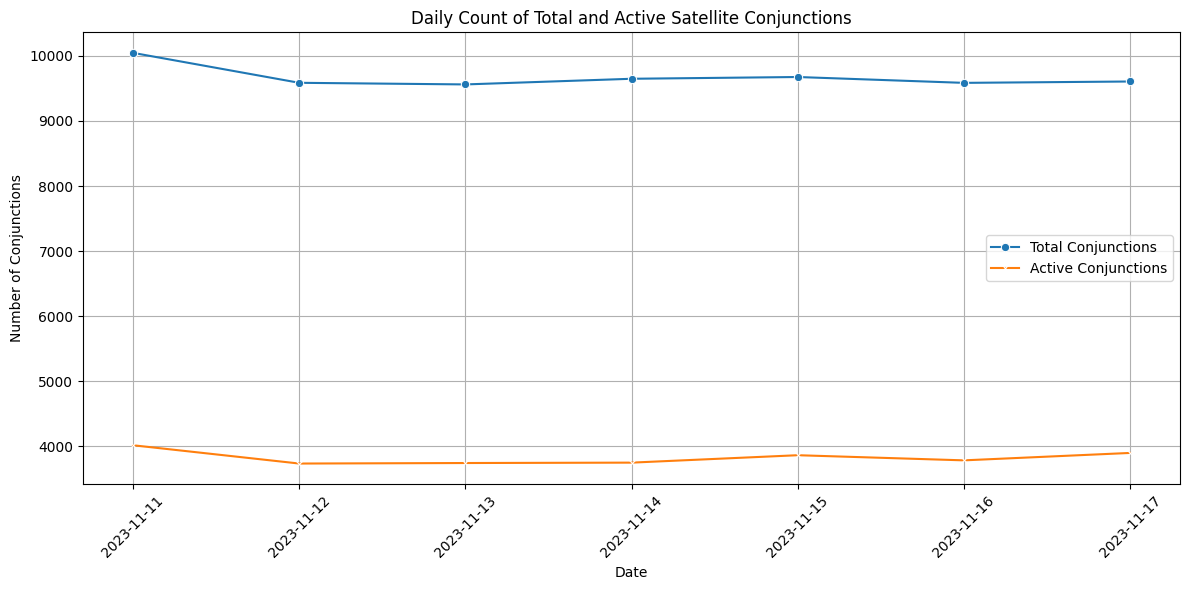

The total number of conjunctions are: 67714

Date-wise total conjunctions:
TCA_DATE
2023-11-11    10047
2023-11-12     9587
2023-11-13     9562
2023-11-14     9649
2023-11-15     9676
2023-11-16     9586
2023-11-17     9607
dtype: int64

Date-wise active satellite conjunctions:
TCA_DATE
2023-11-11    4017
2023-11-12    3736
2023-11-13    3744
2023-11-14    3750
2023-11-15    3864
2023-11-16    3785
2023-11-17    3899
dtype: int64


In [2]:
data['TCA_DATE'] = pd.to_datetime(data['TCA']).dt.date
total_conjunctions = len(data)
datewise_conjunctions = data.groupby('TCA_DATE').size()

# Creating a mask for active satellites
active_mask = (data['OBJECT_NAME_1'].str.contains('\+')) & (data['OBJECT_NAME_2'].str.contains('\+'))
active_satellites = data[active_mask]
datewise_active_conjunctions = active_satellites.groupby('TCA_DATE').size()

# plot for total and active conjunctions
plt.figure(figsize=(12, 6))
sns.lineplot(x=datewise_conjunctions.index, y=datewise_conjunctions.values, label='Total Conjunctions', marker='o')
sns.lineplot(x=datewise_active_conjunctions.index, y=datewise_active_conjunctions.values, label='Active Conjunctions', marker='x')
plt.title('Daily Count of Total and Active Satellite Conjunctions')
plt.xlabel('Date')
plt.ylabel('Number of Conjunctions')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print total number of conjunctions
print(f"The total number of conjunctions are: {total_conjunctions}")

# Print the date-wise total conjunctions
print("\nDate-wise total conjunctions:")
print(datewise_conjunctions)

# Print the date-wise active conjunctions
print("\nDate-wise active satellite conjunctions:")
print(datewise_active_conjunctions)


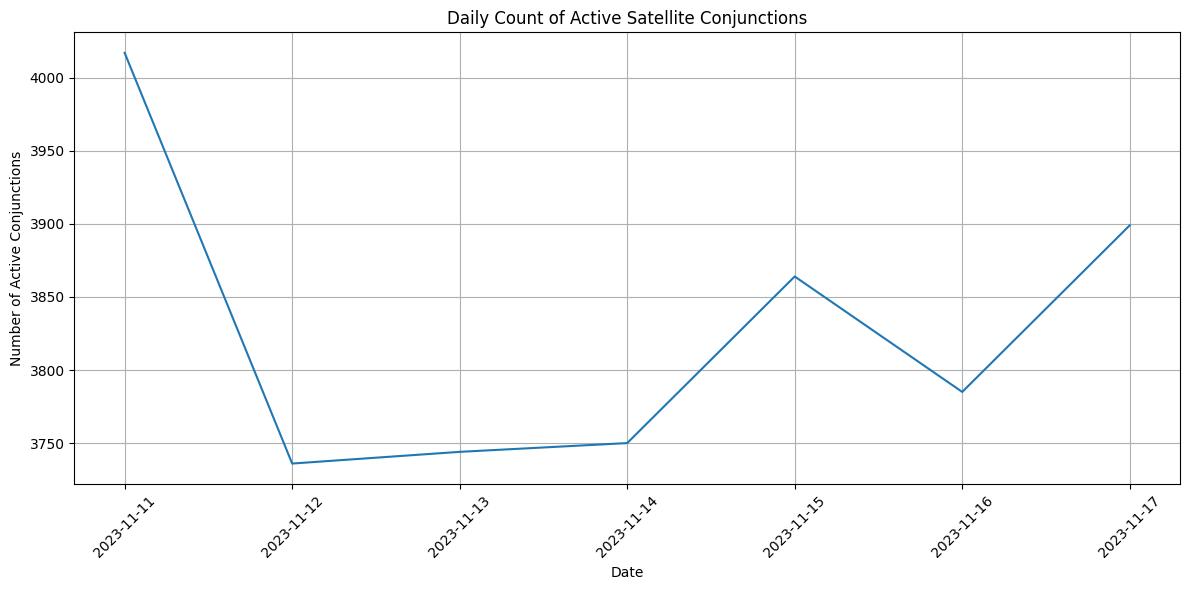


Date-wise active satellite conjunctions:
TCA_DATE
2023-11-11    4017
2023-11-12    3736
2023-11-13    3744
2023-11-14    3750
2023-11-15    3864
2023-11-16    3785
2023-11-17    3899
dtype: int64


In [3]:
# Number of Conjunctions Date Wise of Active Satellites
plt.figure(figsize=(12, 6))
sns.lineplot(x=datewise_active_conjunctions.index, y=datewise_active_conjunctions.values)
plt.title('Daily Count of Active Satellite Conjunctions')
plt.xlabel('Date')
plt.ylabel('Number of Active Conjunctions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nDate-wise active satellite conjunctions:")
print(datewise_active_conjunctions)


From the Above Plot we selected the Date 2023-11-11.

Now we are performing EDA on the Satellites of the Data 2023-11-11

For that we are first Comparing Active Satellites with Total Number of Satellites, Next Analysing the minimum TCA_Range of total number of satellites and Active Satellites and grouping them.

<ipython-input-4-e567eaded4c8>:2: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  data_on_date = data[data['TCA_DATE'] == pd.to_datetime('2023-11-11')]
<ipython-input-4-e567eaded4c8>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  active_conjunctions_on_date = len(data_on_date[active_mask])


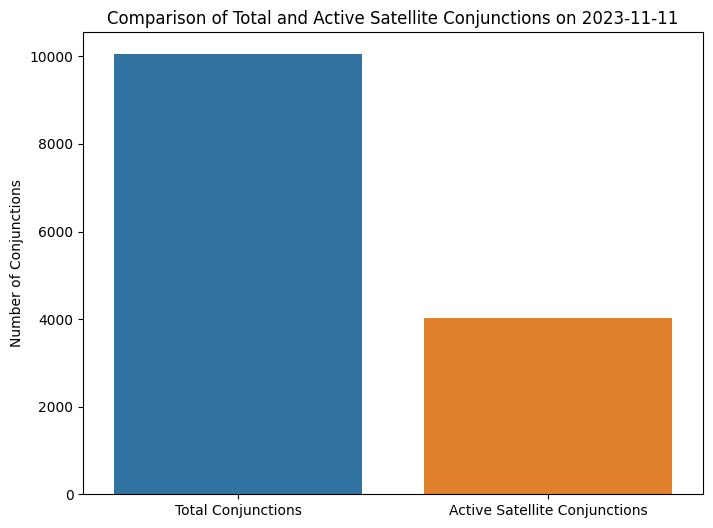

In [4]:
# Extract the data for the specific date
data_on_date = data[data['TCA_DATE'] == pd.to_datetime('2023-11-11')]

# Count total and active satellite conjunctions for the date
total_conjunctions_on_date = len(data_on_date)
active_conjunctions_on_date = len(data_on_date[active_mask])

# Plot the comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=['Total Conjunctions', 'Active Satellite Conjunctions'],
            y=[total_conjunctions_on_date, active_conjunctions_on_date])
plt.title('Comparison of Total and Active Satellite Conjunctions on 2023-11-11')
plt.ylabel('Number of Conjunctions')
plt.show()


### The above plot is pretty self explanatory - It is a comparison between Total Number of Satellite Conjunctions and Active Satellite  Conjunctions

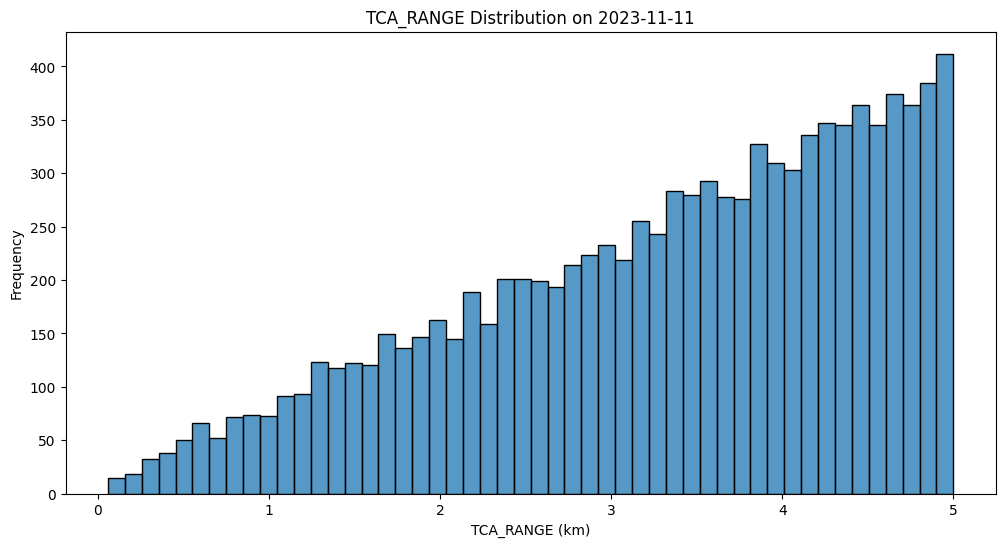

[0, 1)     456
[1, 2)    1230
[2, 3)    1966
[3, 4)    2780
[4, 5)    3613
Name: TCA_RANGE, dtype: int64


In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(data_on_date['TCA_RANGE'], bins=50)  # Adjust bins as needed
plt.title('TCA_RANGE Distribution on 2023-11-11')
plt.xlabel('TCA_RANGE (km)')
plt.ylabel('Frequency')
plt.show()


ranges = [0, 1, 2, 3, 4, 5]
range_categories = pd.cut(data_on_date['TCA_RANGE'], ranges, right=False)
range_counts = range_categories.value_counts().sort_index()
print(range_counts)



### The above plot visualises Total count of satellites from range 0-5 kms on the date of 2023-11-11

<ipython-input-6-d3b3fb15fd3d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  active_data_on_date = data_on_date[active_mask]


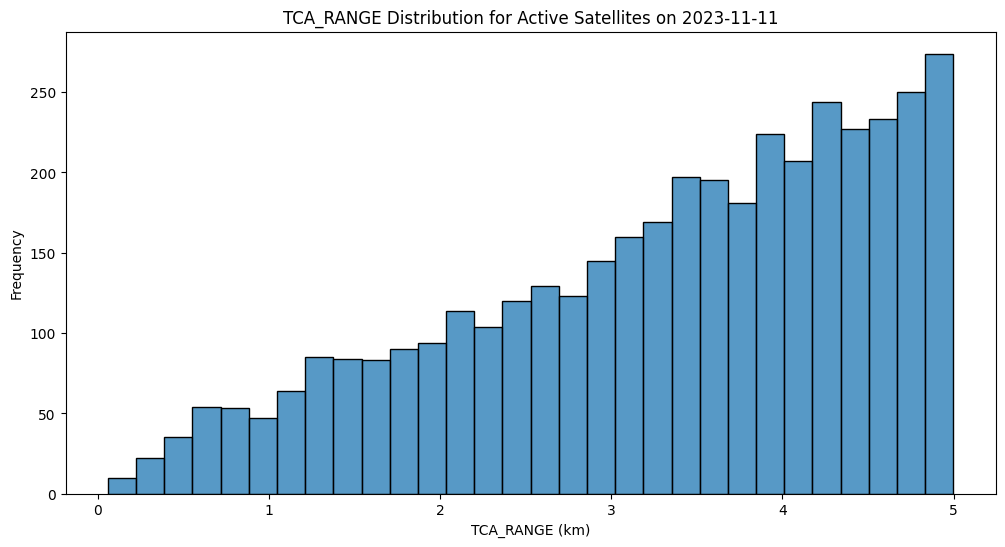

[0, 1)     210
[1, 2)     487
[2, 3)     733
[3, 4)    1141
[4, 5)    1446
Name: TCA_RANGE, dtype: int64


In [6]:
# Filter for active satellite conjunctions on the date
active_data_on_date = data_on_date[active_mask]

# Perform your analysis, for example, a histogram of TCA_RANGE for active satellites
plt.figure(figsize=(12, 6))
sns.histplot(active_data_on_date['TCA_RANGE'], bins=30)
plt.title('TCA_RANGE Distribution for Active Satellites on 2023-11-11')
plt.xlabel('TCA_RANGE (km)')
plt.ylabel('Frequency')
plt.show()


active_range_categories = pd.cut(active_data_on_date['TCA_RANGE'], ranges, right=False)
active_range_counts = active_range_categories.value_counts().sort_index()
print(active_range_counts)


### The above plot visualises Total count of Active Satellites from range 0-5 kms on the date of 2023-11-11

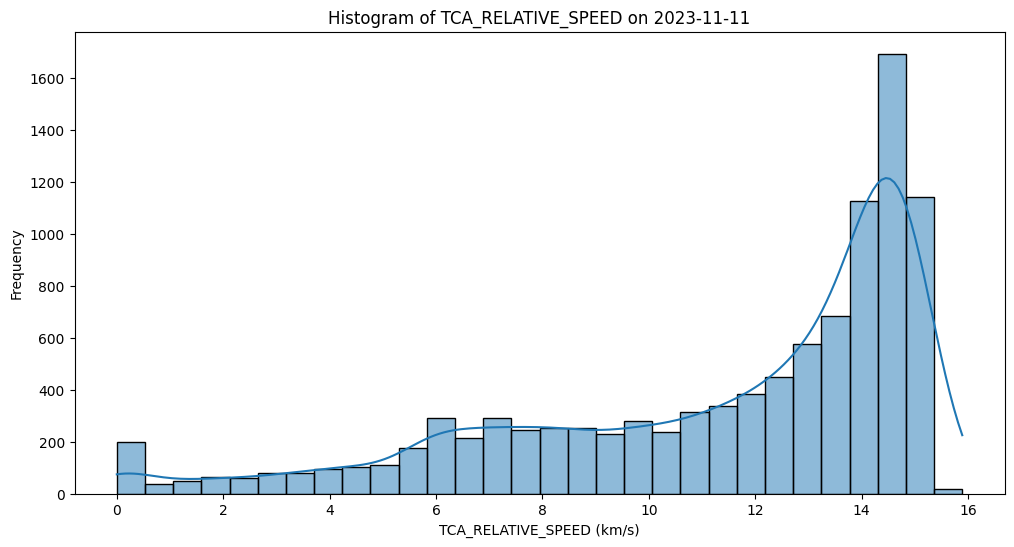

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(data_on_date['TCA_RELATIVE_SPEED'], bins=30, kde=True)
plt.title('Histogram of TCA_RELATIVE_SPEED on 2023-11-11')
plt.xlabel('TCA_RELATIVE_SPEED (km/s)')
plt.ylabel('Frequency')
plt.show()


### The plot demonstrates the relative speed with count of satellites and it also demonstrates that The peak at higher speeds (around 14 km/s), which means most of the satellites have the velocity of 14km/s on 2023-11-11

 Now solving the Part B of Question 1

 B) Represent the conjunctions data of a single satellite or a satellite constellation.
The analytics should be intuitive, represented in an easily understandable format and
should enable decision making from a satellite operator’s point of view.


Now to solve this question we are assuming that the speed of the satellite is controllable by satellite operator.

So we will perform analysis around Relative speed of Satellite Constellation.


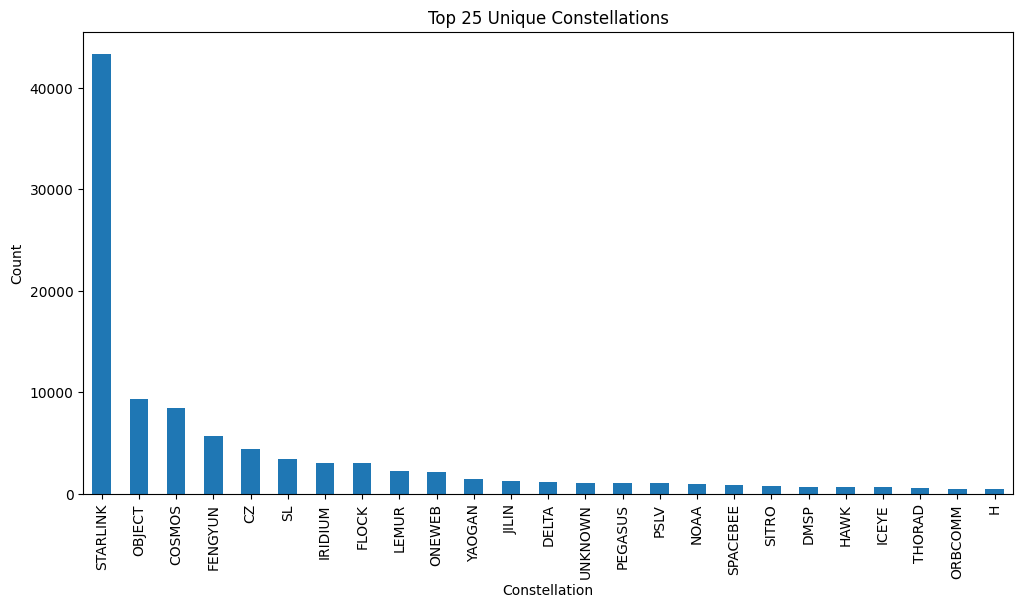

In [15]:
def get_constellation_name(satellite_name):
    return satellite_name.split('-')[0].split(' ')[0]

# Apply the function to the object name columns to create new constellation columns
data['CONSTELLATION_1'] = data['OBJECT_NAME_1'].apply(get_constellation_name)
data['CONSTELLATION_2'] = data['OBJECT_NAME_2'].apply(get_constellation_name)

# Combine the two constellation columns into a single series
all_constellations = pd.concat([data['CONSTELLATION_1'], data['CONSTELLATION_2']])

# Get the count of unique constellations and select the top 25
constellation_counts = all_constellations.value_counts().head(25)

# Plot the counts of the top 25 unique constellations
plt.figure(figsize=(12, 6))
constellation_counts.plot(kind='bar')
plt.title('Top 25 Unique Constellations')
plt.xlabel('Constellation')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.show()


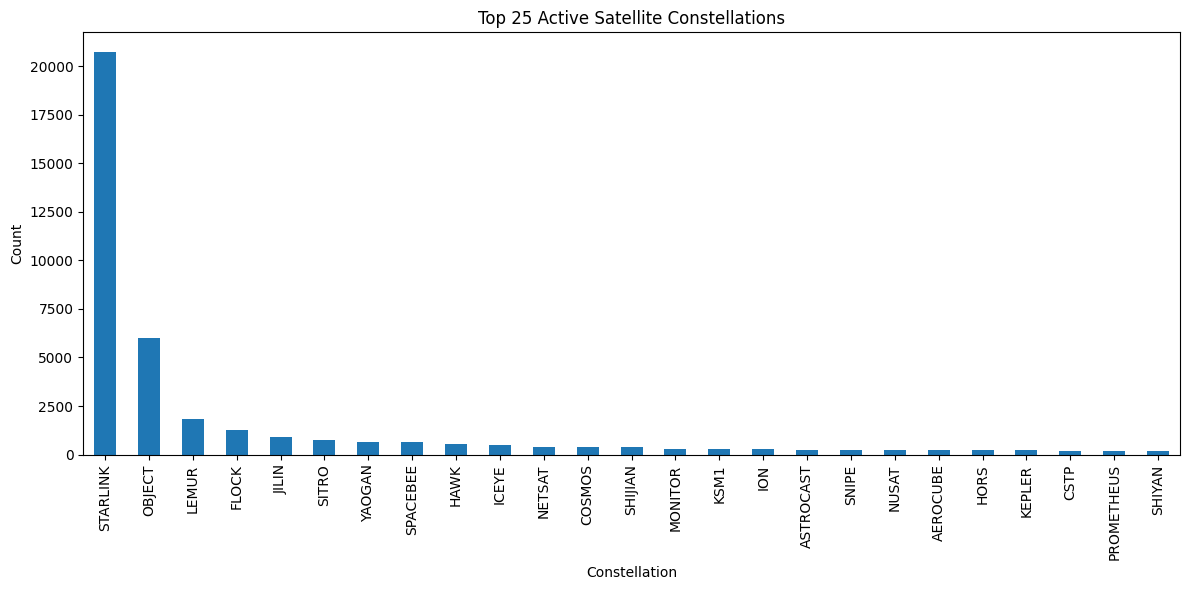

In [16]:

active_mask = (data['OBJECT_NAME_1'].str.contains('\+')) & (data['OBJECT_NAME_2'].str.contains('\+'))
active_satellites = data[active_mask]
active_constellations = pd.concat([active_satellites['CONSTELLATION_1'], active_satellites['CONSTELLATION_2']])
active_constellation_counts = active_constellations.value_counts().head(25)

# Plotting top 25 unique active constellations
plt.figure(figsize=(12, 6))
active_constellation_counts.plot(kind='bar')
plt.title('Top 25 Active Satellite Constellations')
plt.xlabel('Constellation')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<ipython-input-17-e13f821c4433>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  active_starlink = starlink_data[active_mask]
<ipython-input-17-e13f821c4433>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  non_active_starlink = starlink_data[non_active_mask]


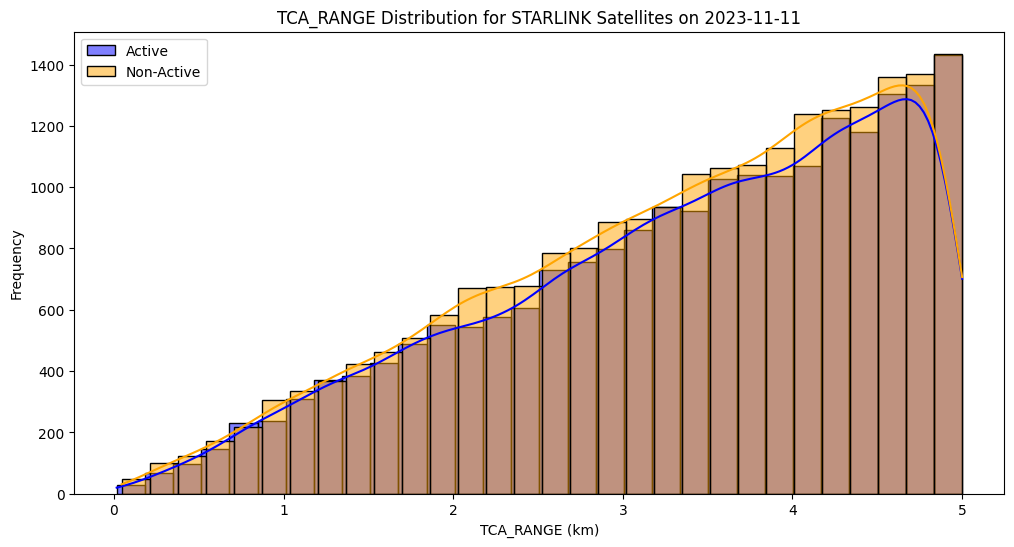

In [17]:
non_active_mask = ~(active_mask)
# Filter data for STARLINK constellation
starlink_data = data[(data['CONSTELLATION_1'] == 'STARLINK') | (data['CONSTELLATION_2'] == 'STARLINK')]
# Filter active and non-active STARLINK satellites
active_starlink = starlink_data[active_mask]
non_active_starlink = starlink_data[non_active_mask]

plt.figure(figsize=(12, 6))
sns.histplot(active_starlink['TCA_RANGE'], bins=30, color='blue', label='Active', kde=True)
sns.histplot(non_active_starlink['TCA_RANGE'], bins=30, color='orange', label='Non-Active', kde=True)
plt.title('TCA_RANGE Distribution for STARLINK Satellites on 2023-11-11')
plt.xlabel('TCA_RANGE (km)')
plt.ylabel('Frequency')
plt.legend()
plt.show()



<ipython-input-11-c6df1a14be10>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starlink_data_on_date.loc[:, 'RANGE_CATEGORY'] = pd.cut(starlink_data_on_date['TCA_RANGE'], bins=ranges, labels=range_labels, right=False)


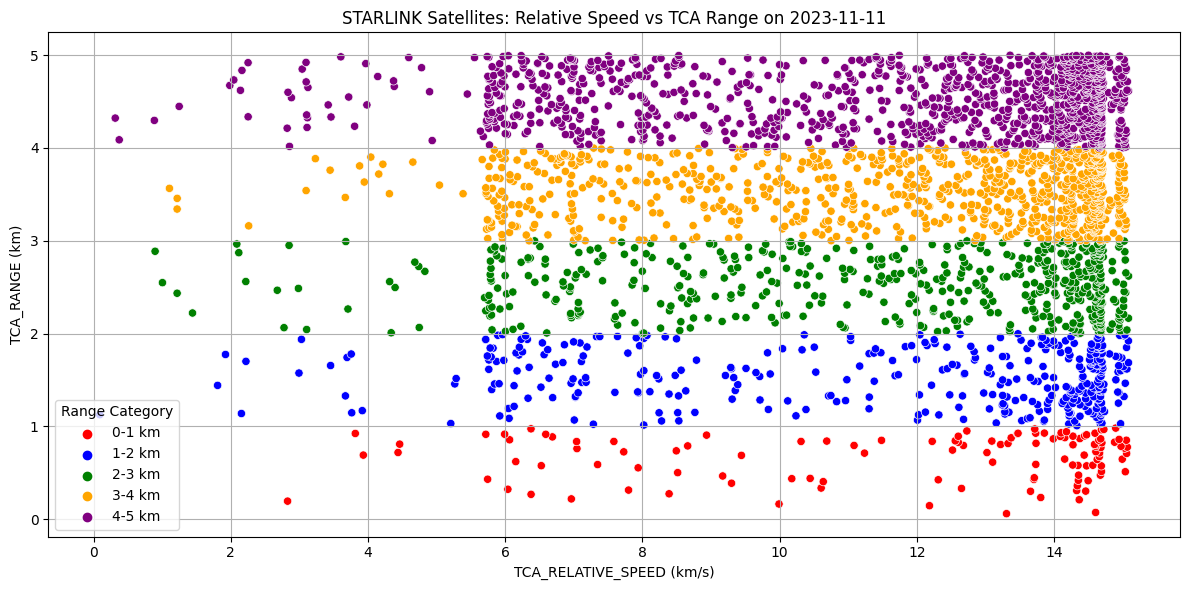

In [11]:
data['CONSTELLATION_1'] = data['OBJECT_NAME_1'].apply(get_constellation_name)
data['CONSTELLATION_2'] = data['OBJECT_NAME_2'].apply(get_constellation_name)

# Filter for active satellites
active_mask = (data['OBJECT_NAME_1'].str.contains('\+')) & (data['OBJECT_NAME_2'].str.contains('\+'))
active_satellites = data[active_mask].copy()

# Filter for STARLINK constellation
starlink_mask = (active_satellites['CONSTELLATION_1'] == 'STARLINK') | (active_satellites['CONSTELLATION_2'] == 'STARLINK')
starlink_data = active_satellites[starlink_mask].copy()

# Convert TCA to datetime and extract the date, using .loc to avoid warning
starlink_data.loc[:, 'TCA_DATE'] = pd.to_datetime(starlink_data['TCA']).dt.date

# Define range categories for coloring the scatter plot
ranges = [0, 1, 2, 3, 4, 5]
range_labels = ['0-1 km', '1-2 km', '2-3 km', '3-4 km', '4-5 km']

# Filter for a specific date
starlink_data_on_date = starlink_data[starlink_data['TCA_DATE'] == pd.to_datetime('2023-11-11').date()]

# Assign range categories, using .loc to avoid warning
starlink_data_on_date.loc[:, 'RANGE_CATEGORY'] = pd.cut(starlink_data_on_date['TCA_RANGE'], bins=ranges, labels=range_labels, right=False)

palette = {
    '0-1 km': 'red',
    '1-2 km': 'blue',
    '2-3 km': 'green',
    '3-4 km': 'orange',
    '4-5 km': 'purple'
}

# Create the scatter plot using the custom palette
plt.figure(figsize=(12, 6))
sns.scatterplot(x='TCA_RELATIVE_SPEED', y='TCA_RANGE', hue='RANGE_CATEGORY', data=starlink_data_on_date, palette=palette)
plt.title('STARLINK Satellites: Relative Speed vs TCA Range on 2023-11-11')
plt.xlabel('TCA_RELATIVE_SPEED (km/s)')
plt.ylabel('TCA_RANGE (km)')
plt.legend(title='Range Category')
plt.grid(True)
plt.tight_layout()
plt.show()


### This unique plot demonstrates the Starlink satellites which are in range of 0-1kms of Conjunction and need to be looked at seriously

### Use the whole dataset that spans about five days. Derive analytics and visualise the data/analytics accounting for the evolution from the first day (for e.g. the number of conjunctions of the RSO having NORAD ID 12345 over 7 days of analysis)

To solve this question we will create a Widgets dashboard  which is only available in Jupyter Notebooks

And in that that dashboard we have all the Norad IDs as a dropdown option and in Slider option we have Date , Realative Speed and Range

In [8]:

norad_ids = pd.concat([data['NORAD_CAT_ID_1'], data['NORAD_CAT_ID_2']]).unique()

# Create widgets for the dashboard
norad_id_dropdown = widgets.Dropdown(
    options=norad_ids,
    description='NORAD ID:',
    disabled=False,
)

date_range_slider = widgets.SelectionRangeSlider(
    options=sorted(data['TCA_DATE'].unique()),
    index=(0, 4),
    description='Date Range',
    disabled=False,
)

speed_slider = widgets.FloatRangeSlider(
    value=[data['TCA_RELATIVE_SPEED'].min(), data['TCA_RELATIVE_SPEED'].max()],
    min=data['TCA_RELATIVE_SPEED'].min(),
    max=data['TCA_RELATIVE_SPEED'].max(),
    step=0.1,
    description='Relative Speed:',
    disabled=False
)

range_slider = widgets.FloatRangeSlider(
    value=[data['TCA_RANGE'].min(), data['TCA_RANGE'].max()],
    min=data['TCA_RANGE'].min(),
    max=data['TCA_RANGE'].max(),
    step=0.1,
    description='Range (km):',
    disabled=False
)

def plot_conjunctions(norad_id, date_range, speed_range, range_km):

    selected_data = data[((data['NORAD_CAT_ID_1'] == norad_id) |
                          (data['NORAD_CAT_ID_2'] == norad_id)) &
                         (data['TCA_DATE'] >= date_range[0]) &
                         (data['TCA_DATE'] <= date_range[1]) &
                         (data['TCA_RELATIVE_SPEED'] >= speed_range[0]) &
                         (data['TCA_RELATIVE_SPEED'] <= speed_range[1]) &
                         (data['TCA_RANGE'] >= range_km[0]) &
                         (data['TCA_RANGE'] <= range_km[1])]


    conjunctions_by_date = selected_data.groupby('TCA_DATE').size()
    # Plot the results
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=conjunctions_by_date.index, y=conjunctions_by_date.values, marker='o')
    plt.title(f'Daily Number of Conjunctions for Satellite with NORAD ID {norad_id}')
    plt.xlabel('Date')
    plt.ylabel('Number of Conjunctions')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


widgets.interactive(plot_conjunctions, norad_id=norad_id_dropdown, date_range=date_range_slider,
                    speed_range=speed_slider, range_km=range_slider)



interactive(children=(Dropdown(description='NORAD ID:', options=(43758, 53682, 41849, 49262, 53994, 43925, 450…